# Predicting survival rate using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns=['Age','Year of op','No.of ax.nodes','Survival status']
hab=pd.read_csv('haberman.csv',names=columns)

In [4]:
hab.head(10)

,Age,Year of op,No.of ax.nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
hab

,Age,Year of op,No.of ax.nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [6]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Year of op       306 non-null    int64
 2   No.of ax.nodes   306 non-null    int64
 3   Survival status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
hab.describe()

,Age,Year of op,No.of ax.nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


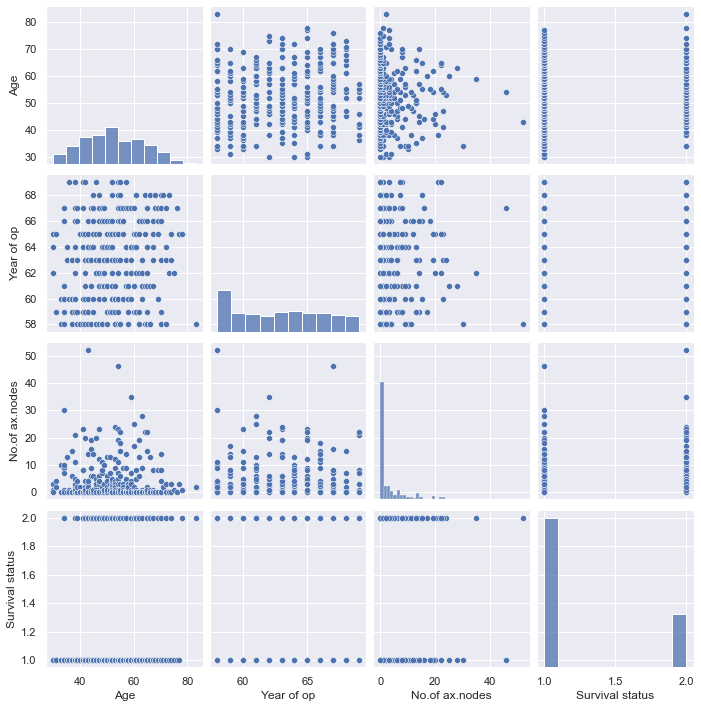

In [9]:
sns.set_theme()
sns.pairplot(data=hab)

In [11]:
x=hab.drop('Survival status',axis=1)
y=hab['Survival status']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
pred=knn.predict(x_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.98      0.87        46
           2       0.75      0.19      0.30        16

    accuracy                           0.77        62
   macro avg       0.76      0.58      0.58        62
weighted avg       0.77      0.77      0.72        62

[[45  1]
 [13  3]]
